In [8]:
import glob
for g in glob.glob('*.yaml'):
    print(g)

CHLAT_20210714.yaml
SAT_HF_20220524.yaml
SAT_LF_20211015.yaml
SAT_MF_20211015.yaml
SPLAT_20210714.yaml


In [9]:
# Standard imports
import numpy as np
import yaml
import toml
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 20]

# bolo-calc import
from bolo import Top

import BoloCalcVariation as bcv

In [10]:
# Set up inputs

# yaml files to use
#telescopes = dict.fromkeys(['CHLAT_20210605.yaml', 'SPLAT_20210605.yaml', 'SAT_LFMF_20210623.yaml', 'SAT_HF_20210623.yaml'])
telescopes = dict.fromkeys(['SAT_LF_20211015.yaml','SAT_MF_20211015.yaml','SAT_HF_20220524.yaml'])


#read fixed PSATs from .toml file
psat = toml.load("FixedPsats.toml")

# input parameter to vary
xparam_name = 'pwv'
xparam_vec = np.arange(100,4000,100)
# in_param possible values:
#  'band_response', 'num_wafer_per_optics_tube', 'num_optics_tube', 
#  'waist_factor', 'psat', 'psat_factor', 'carrier_index', 'Tc', 'Tc_fraction', 
#  'G', 'Flink', 'Yield', 'response_factor', 'bolo_resistance', 'read_frac'

# output parameter to plot and save.
yparam_name = 'NET' #
# out_param possible values:
#  'effic', 'opt_power','tel_rj_temp','sky_rj_temp','NEP_bolo',
#  'NEP_read','NEP_ph','NEP','NET','NET_corr','corr_fact','NET_arr'

# Run SAT LF

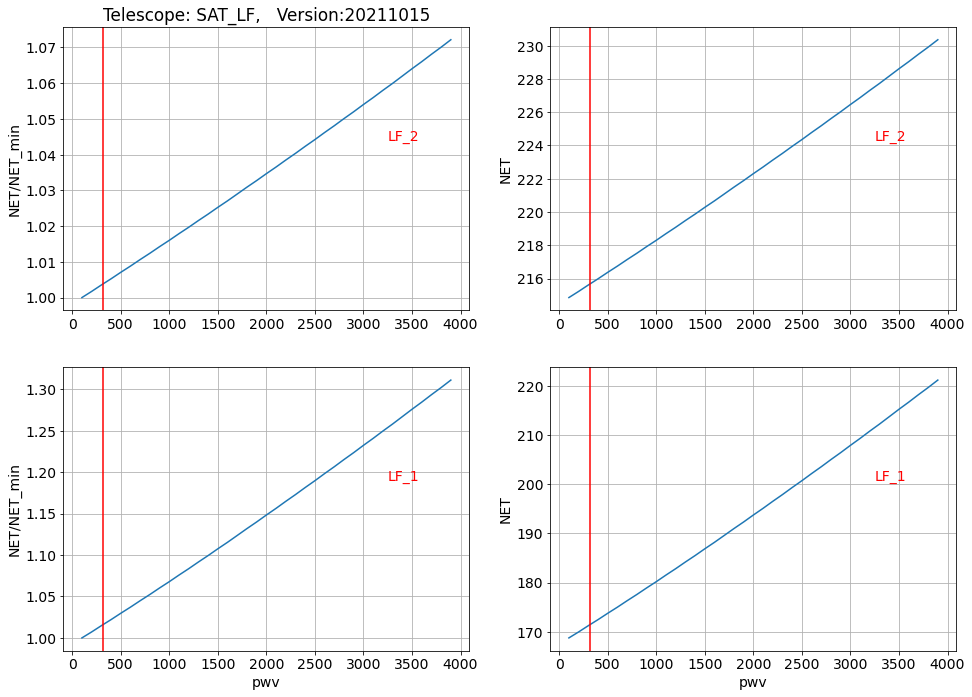

In [11]:
yaml_file = list(telescopes.keys())[0]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../scripts'
dd['version']['yaml']=yaml_file

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 24]
channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)[1]
telescopes[yaml_file] = channel_dict

# Run SAT MF

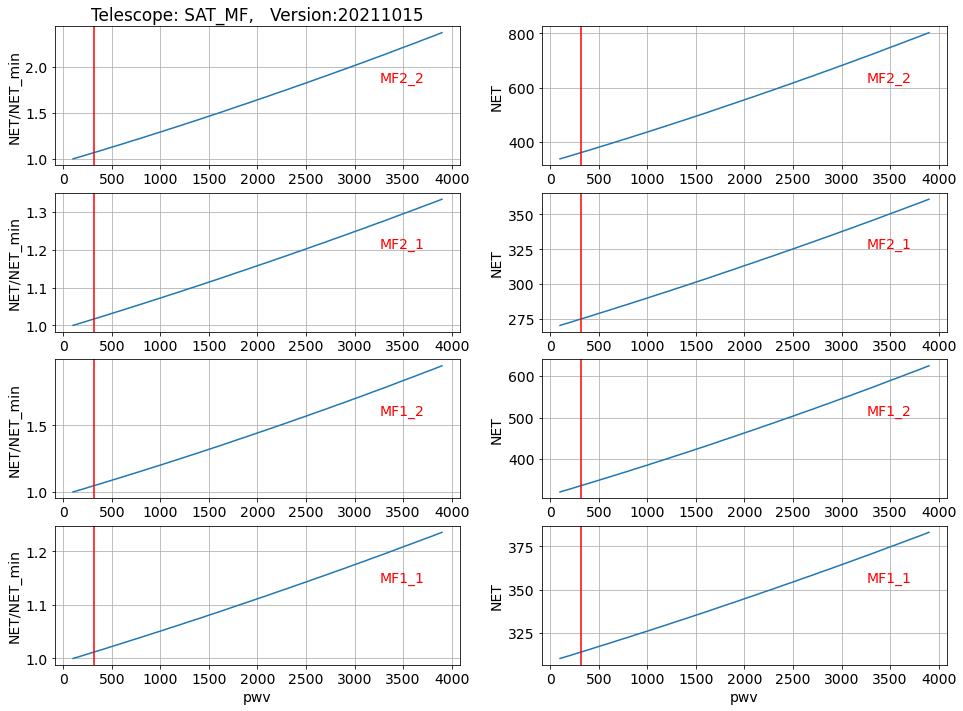

In [12]:
yaml_file = list(telescopes.keys())[1]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../scripts'
dd['version']['yaml']=yaml_file

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 24]
channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)[1]
telescopes[yaml_file] = channel_dict

# Run SAT HF

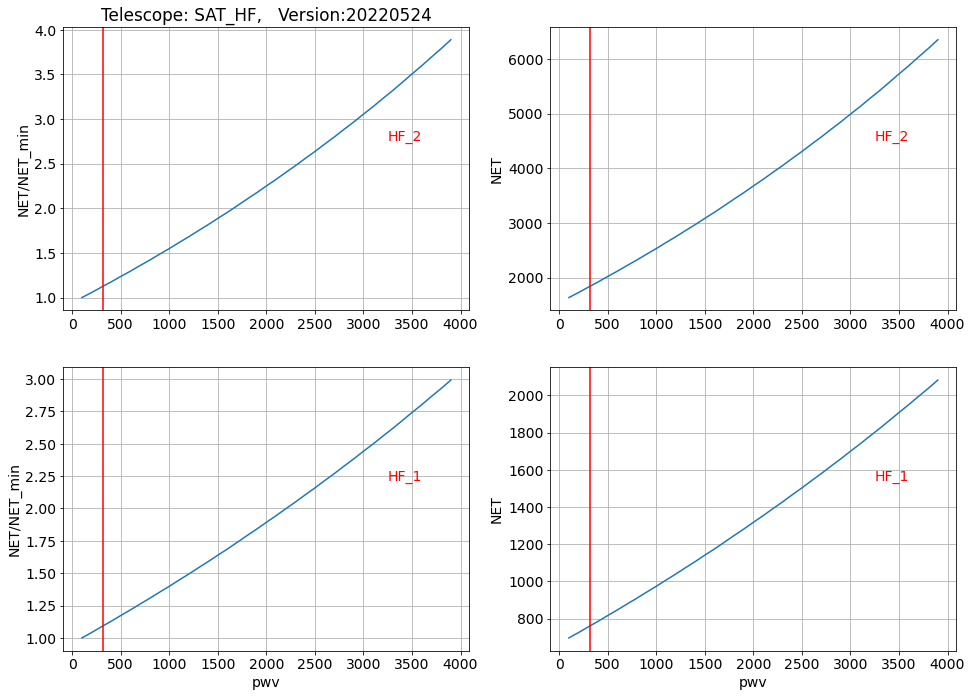

In [13]:
yaml_file = list(telescopes.keys())[2]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../scripts'
dd['version']['yaml']=yaml_file

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 24]
version_date, channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)
telescopes[yaml_file] = channel_dict

# Write all three SATs to toml file.

In [14]:
telescopes["runtime"] = datetime.today().strftime('%Y/%m/%d %H:%M:%S')
telescopes["input_id"] = version_date
telescopes["variation"] = yparam_name + '_v_' + xparam_name

output_file_name = telescopes['variation'] + '.toml'

with open('outputs/' + output_file_name, "w") as toml_file:
    toml.dump(telescopes, toml_file, encoder=toml.TomlNumpyEncoder())